


# Avaliação 2 – Professor Thomas. 
## Curso de Data Science – Skill Lab Brasil

### Grupo:

- Carlos
- Israel
- Lenilson
- Nara

Olá pessoal!

Este é o enunciado da Avaliação 2. Ela aborda os temas de Visualização de dados, Tratamento de dados e modelos de Machine Learning Supervisionado para classificação e regressão.

Diferentemente da nossa Avaliação 1, esta avaliação é em grupo, e se baseia em construir uma solução de data Science sobre um conjunto de dados já abordado em aula, e ao final apresentar os resultados para a turma. Isso será feito por meio da participação em uma competição real no site da Kaggle!

### O que vocês devem fazer

Criar uma solução completa de Data Science para a **competição do Titanic**, que envolva Visualização de dados, Tratamento de dados e o modelo utilizado para predição de sobrevivência dos passageiros. Basicamente, vocês vão ter a experiência de participar em uma competição de Data Science e buscar o melhor resultado possível. Também, devem submeter a predição obtida no site da Kaggle para pontuação.

Informações sobre a competição, sobre o formato dos arquivos de dados, e sobre como realizar as submissões podem ser obtidas diretamente em: https://www.kaggle.com/c/titanic (Links para um site externo.)

O problema do Titanic é de classificação. Para podermos colocar em prática também o que foi aprendido com regressão, uma técnica interessante será utilizada para preencher dados faltantes na coluna "Age". Para completar a coluna "Age", vocês devem criar um **modelo de regressão**, que tem como entrada as outras colunas, e como saída os valores da coluna "Age". Para tanto, utilizem as linhas com valores existentes de "Age" para criar os conjunto de treinamento e teste desta regressão.

A Visualização de dados pode ser feita da mesma maneira como vimos na aula de Visualização de Dados. Outros gráficos e insights são bem vindos. A regressão para completar dados faltantes na coluna "Age" e a classificação geral do modelo devem ser feitas com **modelos estudados nas aulas**, tanto minhas quanto do Marcelo. Os dados faltantes nas outras colunas além de "Age" podem ser tratados (ou ignorados) da maneira que for mais conveniente.  Vocês estão livres para testar métodos de Tratamento de dados que resultem na maior pontuação possível!

### O que vocês devem entregar:

Um integrante de cada grupo deve entregar **dois arquivos**: o arquivo com o **código da solução em Python**, e uma imagem com a captura de tela da **pontuação obtida no site da Kaggle**.

Não se esqueçam de incluir no arquivo de código os nomes dos integrantes do grupo.

### Critérios de avaliação:

**2 pontos**: Visualização de dados (pode ser igual à realizada em aula)

**3 ponto**: Criação do modelo de regressão para completar dados faltantes na coluna "Age"

**5 pontos (metade da nota)**: será proporcional à pontuação obtida por meio da submissão no Kaggle. Como uma pontuação igual a 1 é inalcançável, a nota será normalizada entre 0 e a pontuação máxima obtida entre todos os grupos. Por exemplo, o grupo que conseguir a maior pontuação receberá 5 pontos. Um grupo que consiga metade dessa pontuação máxima receberá 2.5 pontos, e assim por diante. Lembrando que a normalização ajudará a elevar a nota de todos os grupos, ao mesmo tempo que premia a melhor pontuação com nota máxima!

**Total: 10 pontos**

### Entrega e apresentação:

As apresentações serão feitas na aula do dia 17/05. Cada grupo terá no máximo 15 minutos. É ideal que todos do grupo participem, e que apenas um integrante fique responsável pelo compartilhamento da tela.

A entrega será realizada no máximo até o mesmo dia, 17/05, até as 23h59.

Dúvidas serão retiradas na aula do dia 12/05.

 

Bom trabalho a todos!

## 1. Visualização de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
# carrega dataset no dataframe
df = pd.read_csv('train.csv')

In [3]:
# mostrar os 5 primeiros
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checar o shape
df.shape

(891, 12)

In [5]:
# ver colunas
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- **Pclass**: classe (1,2,3)
- **SibSp**: Qtde conjuge e irmaos a bordo
- **Parch** : QTde de filhos e pais
- **Ticket**: número do ticket
- **Fare** : preço da tarifa
- **Cabin**: Cabine        

- **Embarked** : Porto no qual embarcou

In [6]:
# types das colunas
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# verificar valores nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

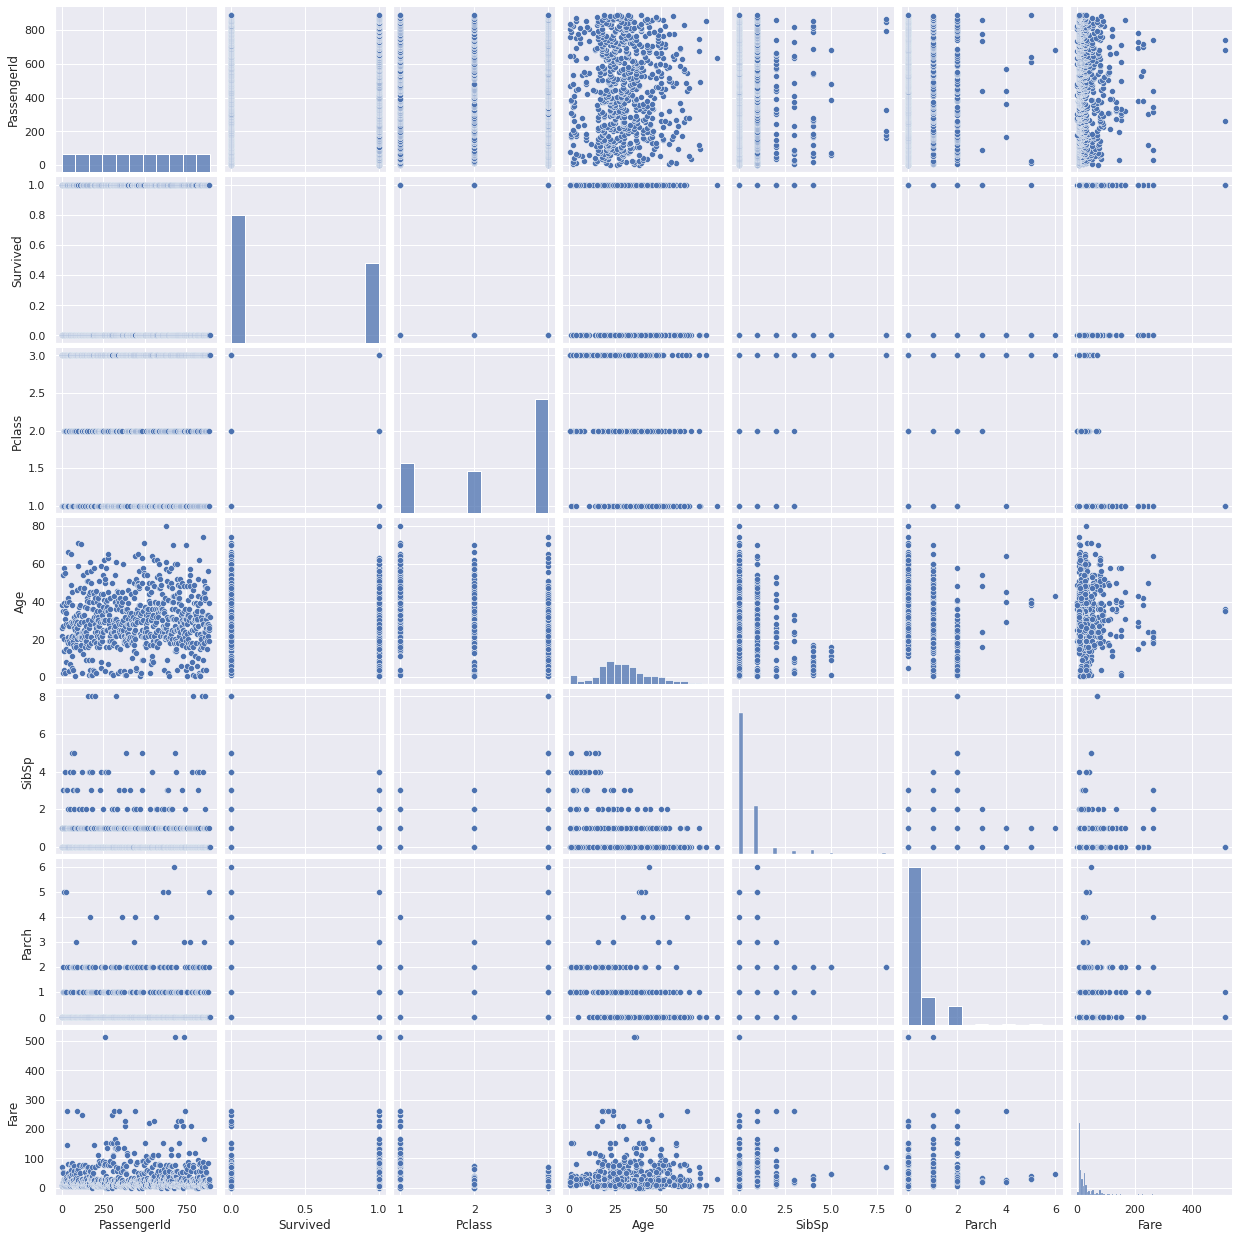

In [9]:
sns.pairplot(data=df)

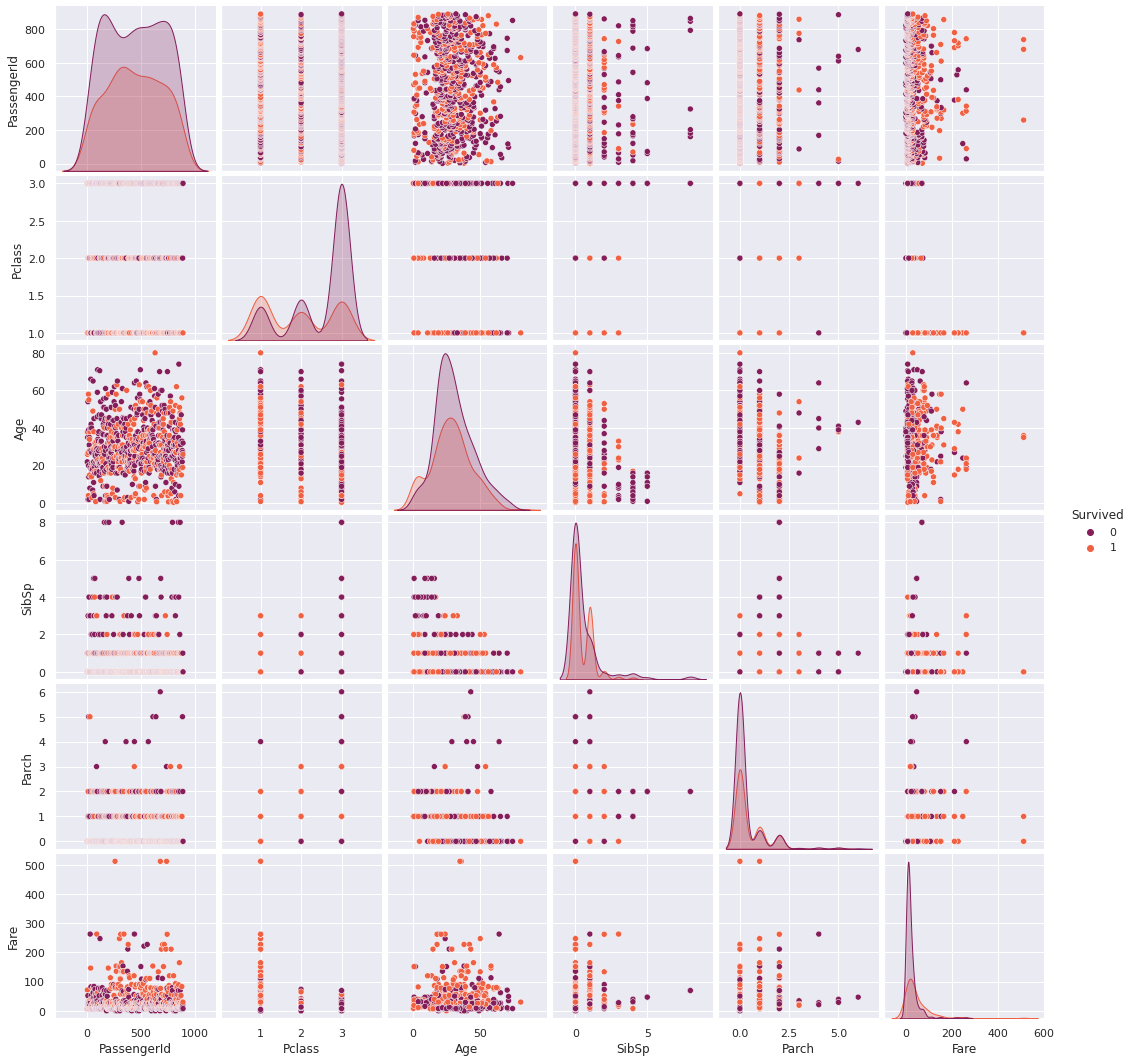

In [10]:
sns.pairplot(data=df, hue='Survived', palette='rocket')

In [11]:
# contar homens e mulheres

sex_count = df.groupby('Sex')['Sex'].count()
print(sex_count)

Sex
female    314
male      577
Name: Sex, dtype: int64


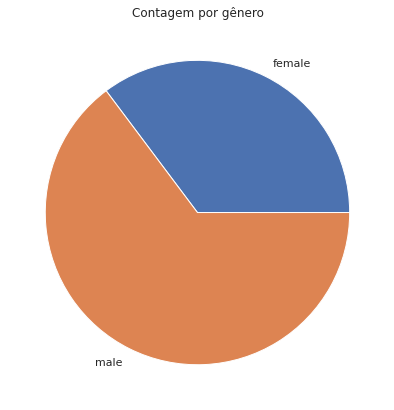

In [12]:
plt.figure(figsize=(7,7))
plt.title('Contagem por gênero')
plt.pie(sex_count.values, labels=sex_count.index)
plt.show()

In [13]:
embarked_count = df.groupby('Embarked')['Embarked'].count()

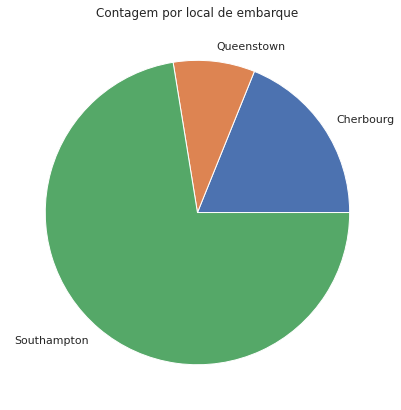

In [14]:
plt.figure(figsize=(7,7))
plt.title('Contagem por local de embarque')
#plt.pie(embarked_count.values, labels=embarked_count.index)
plt.pie(embarked_count.values, labels=['Cherbourg', 'Queenstown','Southampton'])
plt.show()

In [15]:
cabin_count = df.groupby('Cabin')['Cabin'].count()

In [16]:
def extrai_inicial(x):
    return x[0]

cabines = df['Cabin'].dropna()
cabines = cabines.apply(extrai_inicial)

print(cabines)

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: Cabin, Length: 204, dtype: object


In [17]:
#cabines_count = cabines.groupby('Cabin')['Cabin'].count()
cabines_count = cabines.value_counts()


print(cabines_count)


C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64


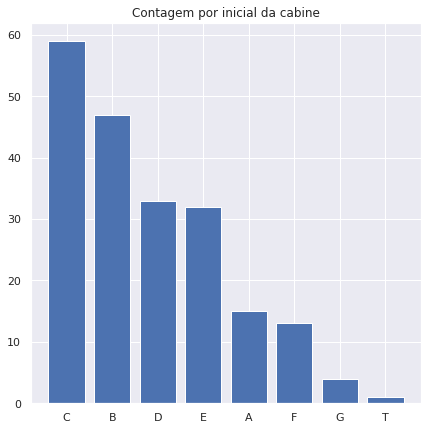

In [18]:
plt.figure(figsize=(7,7))
plt.title('Contagem por inicial da cabine')
plt.bar(cabines_count.index, cabines_count.values)
plt.show()

In [19]:
survived_sex = df.groupby('Sex')['Survived'].sum()
print(survived_sex)

Sex
female    233
male      109
Name: Survived, dtype: int64


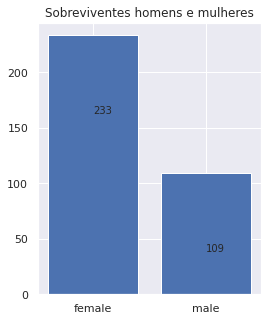

In [20]:
plt.figure(figsize=(4,5))
plt.title('Sobreviventes homens e mulheres')
plt.bar(survived_sex.index, survived_sex.values)

for i, value in enumerate(survived_sex.values):
    plt.text(i, value-70, str(value))

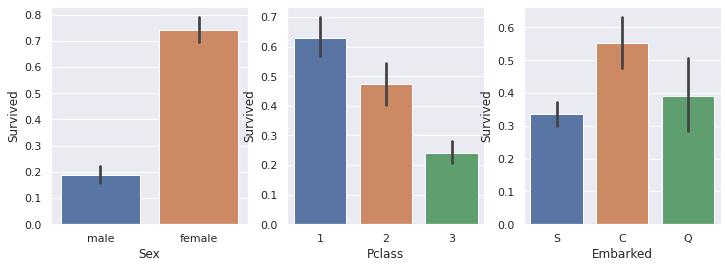

In [21]:
fig, (axis1, axis2 , axis3) = plt.subplots(1,3,figsize=(12,4))
sns.barplot(x='Sex', y='Survived', data=df, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=df, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=df, ax=axis3)

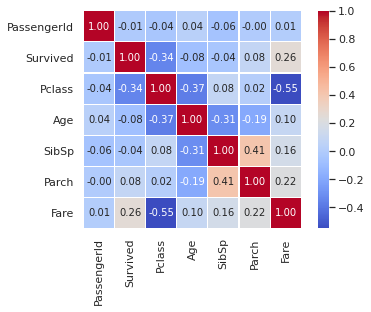

In [22]:
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True)

## 2. Criação do modelo de regressão para completar dados faltantes na coluna "Age"

In [23]:
# verificar valores nulos
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df_no_age = df[df['Age'].isna()]


In [25]:
df_no_age.shape

(177, 12)

In [26]:
df_with_age = df.dropna(subset=['Age'])

In [27]:
df_with_age.shape

(714, 12)

In [28]:
df_with_age.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [29]:
# retirando as duas linhascom Embarked nulos
df_with_age_no_embarked = df_with_age.dropna(subset=['Embarked'])

In [30]:
# Retirando coluna Cabin
df_age_no_nulls = df_with_age_no_embarked.dropna(axis='columns')

In [31]:
df_age_no_nulls.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [32]:
df_age_no_nulls.shape

(712, 11)

In [33]:
df_age_no_nulls.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [34]:
df_age_no_nulls.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [35]:
# dummy variable para
# Sex e Embarked

In [36]:
sex_count = df_age_no_nulls.groupby('Sex')['Sex'].count()
print(sex_count)

Sex
female    259
male      453
Name: Sex, dtype: int64


In [37]:
embarked_count = df_age_no_nulls.groupby('Embarked')['Embarked'].count()
print(embarked_count)

Embarked
C    130
Q     28
S    554
Name: Embarked, dtype: int64


In [38]:
dummies_sex = pd.get_dummies(df_age_no_nulls['Sex']).rename(columns=lambda x: 'Sex_' + str(x))
dummies_embarked = pd.get_dummies(df_age_no_nulls['Embarked']).rename(columns=lambda x: 'Embarked_' + str(x))

In [39]:
dummies_sex

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [40]:
df_age_with_dummies = pd.concat([df_age_no_nulls, dummies_sex, dummies_embarked], axis=1)
df_age_with_dummies = df_age_with_dummies.drop(['Sex', 'Embarked'], axis=1)


In [41]:
df_age_with_dummies.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Sex_female       uint8
Sex_male         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [42]:
# feature scaling?

In [43]:
# escolher as colunas para criar o modelo
# Definindo a target

#features_model_age = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S'] 
#features_model_age = ['Pclass', 'SibSp', 'Parch'] 
features_model_age = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S'] 

target_model_age = ['Age']

In [44]:
from sklearn.model_selection import train_test_split

X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(df_age_with_dummies[features_model_age], df_age_with_dummies[target_model_age], test_size=0.2, random_state=42)


In [45]:
from sklearn.svm import SVR

model_age = SVR()

In [46]:
from sklearn import linear_model

model_age_linear = linear_model.LinearRegression()

In [47]:
model_age.fit(X_train_age, y_train_age)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [48]:
model_age_linear.fit(X_train_age, y_train_age)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y_pred_age = model_age.predict(X_test_age)

# arredondar:
print(type(y_pred_age))
y_pred_age_round = np.array([round(age) for age in y_pred_age])


<class 'numpy.ndarray'>


In [50]:
y_pred_age_linear = model_age_linear.predict(X_test_age)

# arredondar:
print(type(y_pred_age_linear))
#y_pred_age_round_linear = np.array([round(age) for age in y_pred_age_linear])


<class 'numpy.ndarray'>


In [51]:
from sklearn.metrics import mean_absolute_error
mae_age = mean_absolute_error(y_test_age, y_pred_age_round)
print(mae_age)

12.146853146853147


In [52]:
mae_age_linear = mean_absolute_error(y_test_age, y_pred_age_linear)
print(mae_age_linear)

10.766000323577272


#### Fazendo com Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state=42)

In [54]:
random_forest.fit(X_train_age, y_train_age)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [55]:
y_pred_age_rfr = random_forest.predict(X_test_age)

In [56]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_age, y_pred_age_rfr)
print('MAE: ', mae)

MAE:  9.901610709816808


In [57]:
# Grid Search para encontrar os parâmetros do melhor modelo

In [58]:
from sklearn.model_selection import GridSearchCV

random_forest_tuning = RandomForestRegressor(random_state=42)

In [59]:
param_grid = {
    'n_estimators': [100, 200, 500, 800, 1000],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['mae'],
    'bootstrap': [True, False]
}

In [60]:
grid_search = GridSearchCV(estimator=random_forest_tuning, 
                           param_grid=param_grid, 
                           cv=3,
                          verbose=1,
                          n_jobs=-1)

In [61]:
grid_search.fit(X_train_age, y_train_age)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.5min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [62]:
# Visualizando os melhores parametros
grid_search.best_params_

{'bootstrap': True,
 'criterion': 'mae',
 'max_features': 'sqrt',
 'n_estimators': 800}

In [63]:
# Escolhendo o melhor modelo encontrado
# best_estimator_ é o modelo treinado com as melhores configurações, encontrado no GridSearch
best_random_forest = grid_search.best_estimator_

In [64]:
# Predição
y_pred_best_age = best_random_forest.predict(X_test_age)

In [65]:
mae = mean_absolute_error(y_test_age, y_pred_best_age)
print('MAE: ', mae)

MAE:  10.27130839160839


In [66]:
best_random_forest.score(X_train_age, y_train_age)

0.7087575727728138

#### Predição da idade dos dados faltantes

In [67]:
#X_no_age = df_no_age.drop('Age', axis=1)
#y_no_age = df_no_age['Age']

In [68]:
df_no_age_no_nulls = df_no_age.dropna(axis='columns')

In [69]:
df_no_age_no_nulls.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [70]:
dummies_sex_no_age = pd.get_dummies(df_no_age_no_nulls['Sex']).rename(columns=lambda x: 'Sex_' + str(x))
dummies_embarked_no_age = pd.get_dummies(df_no_age_no_nulls['Embarked']).rename(columns=lambda x: 'Embarked_' + str(x))

In [71]:
df_no_age_with_dummies = pd.concat([df_no_age_no_nulls, dummies_sex_no_age, dummies_embarked_no_age], axis=1)
df_no_age_with_dummies = df_no_age_with_dummies.drop(['Sex', 'Embarked'], axis=1)


In [72]:
df_no_age_with_dummies_with_selected_features = df_no_age_with_dummies[features_model_age]

In [73]:
age_completion = best_random_forest.predict(df_no_age_with_dummies_with_selected_features)

In [74]:
age_completion


array([34.9119    , 37.691875  , 19.59131875, 34.12625   , 19.9440625 ,
       25.63875   , 29.7174    , 20.809375  , 23.75250625, 31.6210625 ,
       29.823125  , 32.7033375 , 20.809375  , 22.51130625, 35.0884375 ,
       40.0425    , 10.38666875, 25.63875   , 29.823125  , 20.7896875 ,
       29.823125  , 29.823125  , 25.63875   , 25.2025    , 22.64609375,
       29.823125  , 38.238125  , 14.19669375, 20.0559375 , 24.9896875 ,
       24.2975    , 10.689075  , 26.5575    , 55.9771875 , 11.7696875 ,
       15.155625  , 27.4976125 , 37.1584375 , 21.02234375, 38.238125  ,
       20.809375  , 10.689075  , 33.860625  , 25.63875   ,  8.755625  ,
       32.4575    , 17.6278125 , 21.02234375, 24.9896875 , 29.959375  ,
       38.238125  , 24.8853125 , 48.2309375 , 20.809375  , 33.8115625 ,
       55.8890625 , 40.0425    , 42.0959375 , 20.809375  , 24.48495625,
       27.4565625 , 29.823125  , 34.345     , 10.689075  , 18.85640625,
       33.981875  , 25.63875   , 26.0625    , 48.5996875 , 34.12

In [75]:
# arrendodar
age_completion_round = np.array([round(age) for age in age_completion])

In [76]:

#df_passengers = pd.concat([df_no_age, age_completion], axis=1)

df_passengers_no_age = df_no_age
df_passengers_no_age['Age'] = age_completion_round.tolist()
df_passengers_no_age.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,35,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,38,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,20,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,34,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,20,0,0,330959,7.8792,NaN,Q


In [77]:
df_passengers_no_age.shape

(177, 12)

In [78]:
df_passengers_all = pd.concat([df_with_age, df_passengers_no_age], axis=0)

In [79]:
df_passengers_all.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. Modelo de Classificação 

In [80]:
# titanic_df = df
titanic_df = df_passengers_all

In [81]:
titanic_df = titanic_df.drop(columns=['Name', 'Cabin', 'Embarked', 'Ticket'])

In [82]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [83]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
859,860,0,3,male,26.0,0,0,7.2292
863,864,0,3,female,15.0,8,2,69.5500
868,869,0,3,male,23.0,0,0,9.5000
878,879,0,3,male,26.0,0,0,7.8958


In [84]:
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

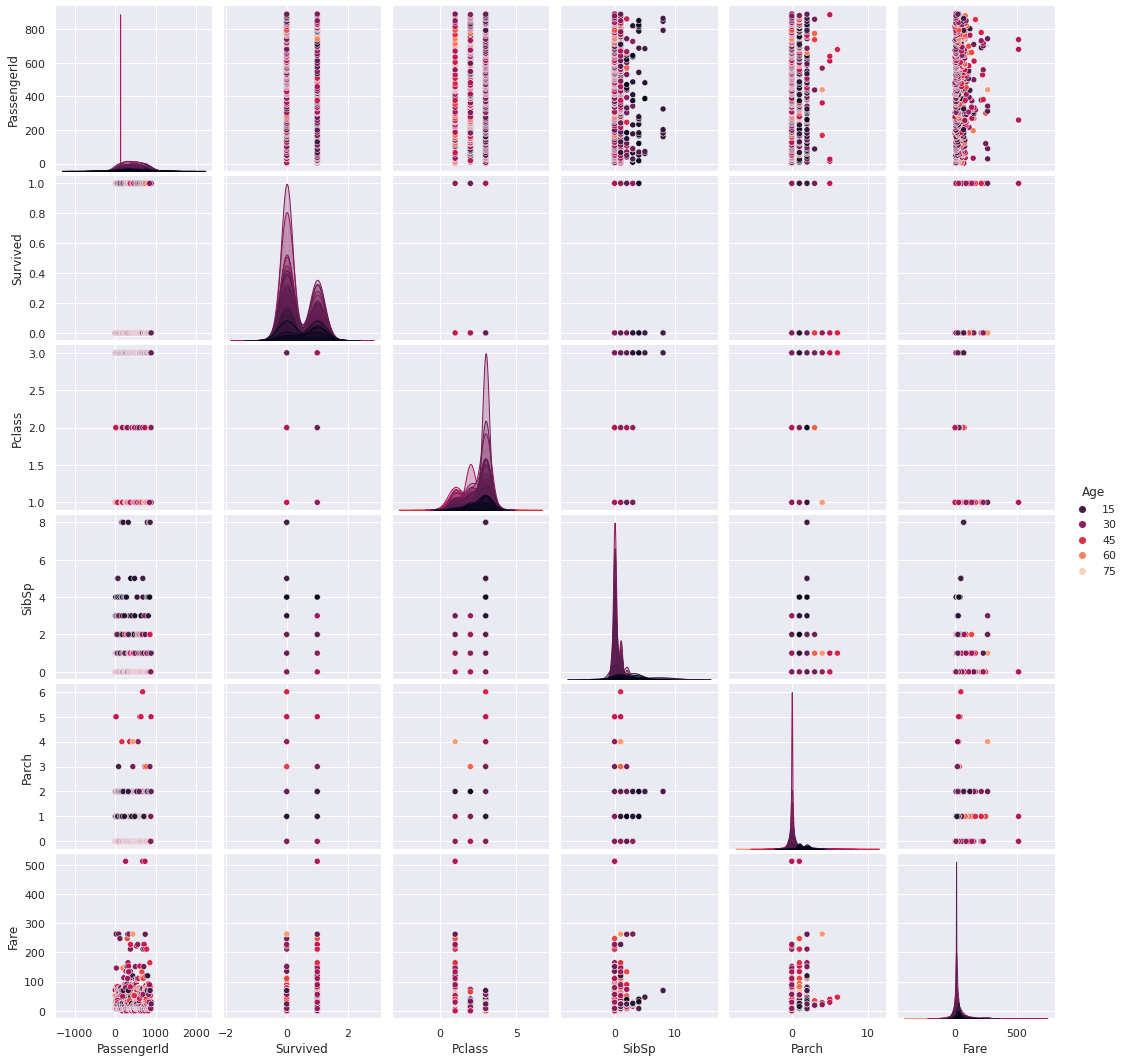

In [85]:
sns.pairplot(data=titanic_df, hue='Age', palette = 'rocket');

In [86]:
#drop das linhas nulas da idade (Age)
#titanic_df = titanic_df[titanic_df['Age'].notna()]

In [87]:
#Substituindo o Age nulo pela média
titanic_df.loc[titanic_df['Age'].isnull(), 'Age'] = int(titanic_df.Age.mean())

In [88]:
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [89]:
titanic_df['Sex'] = titanic_df['Sex'].map(lambda s :1  if s == 'female' else 0)
pd.unique(titanic_df['Sex'])

array([0, 1])

In [90]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
859,860,0,3,0,26.0,0,0,7.2292
863,864,0,3,1,15.0,8,2,69.5500
868,869,0,3,0,23.0,0,0,9.5000
878,879,0,3,0,26.0,0,0,7.8958


In [91]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [92]:
cols = [col for col in titanic_df if col != 'Survived'] + ['Survived']

titanic_df = titanic_df[cols]

titanic_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
859,860,3,0,26.0,0,0,7.2292,0
863,864,3,1,15.0,8,2,69.5500,0
868,869,3,0,23.0,0,0,9.5000,0
878,879,3,0,26.0,0,0,7.8958,0


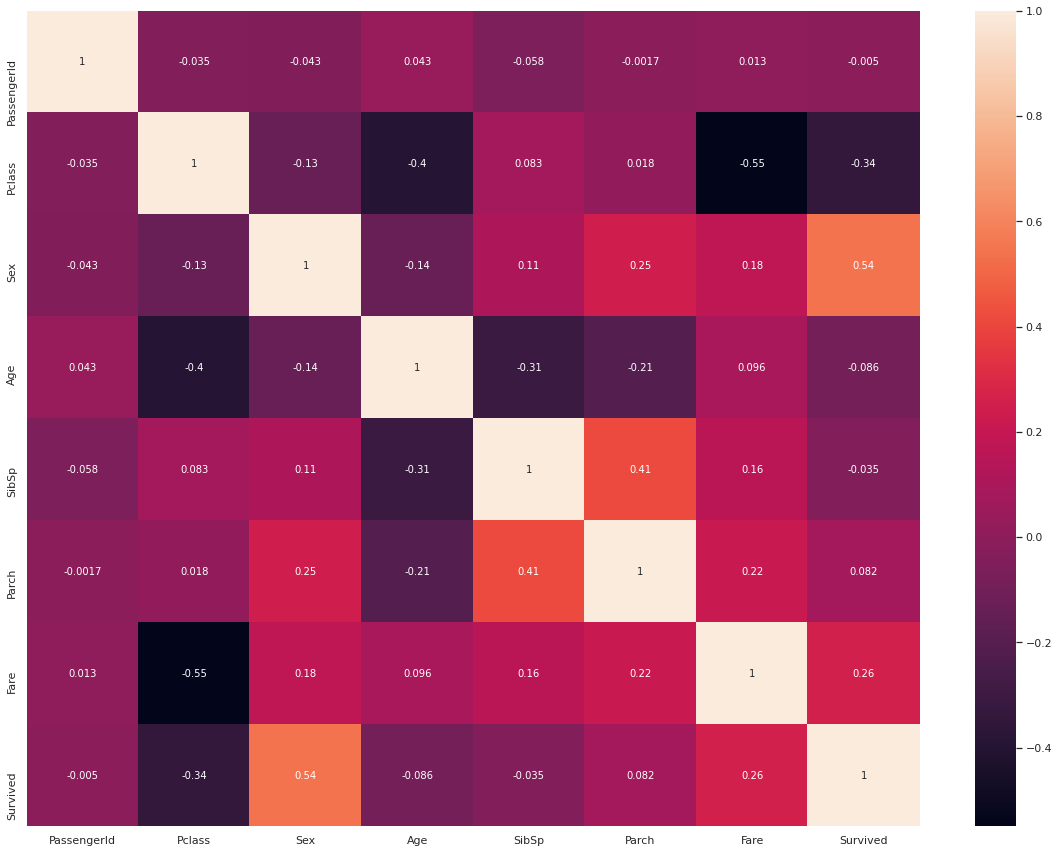

In [93]:
corr = titanic_df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True);

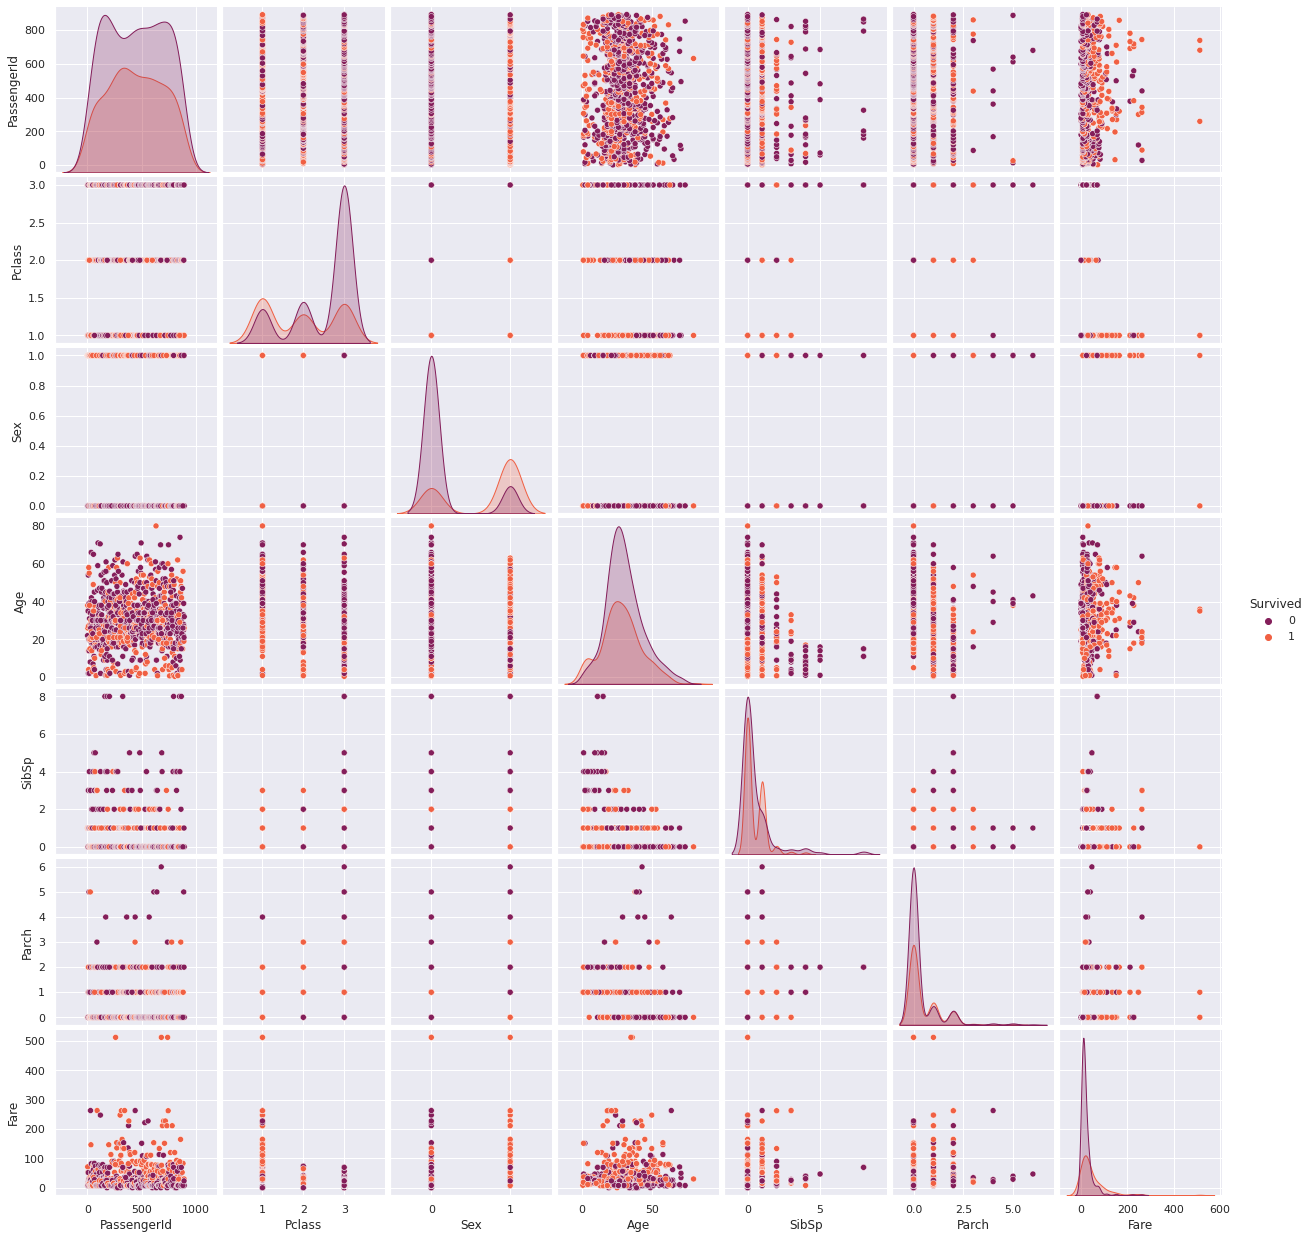

In [94]:
sns.pairplot(data=titanic_df, hue='Survived', palette = 'rocket')

In [95]:
features = pd.DataFrame(data=titanic_df, columns=[column for column in titanic_df.columns if column != 'Survived' ])
target = pd.DataFrame(data=titanic_df, columns=['Survived'])

In [96]:
features

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,0,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,3,1,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
859,860,3,0,26.0,0,0,7.2292
863,864,3,1,15.0,8,2,69.5500
868,869,3,0,23.0,0,0,9.5000
878,879,3,0,26.0,0,0,7.8958


In [97]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
859,0
863,0
868,0
878,0


In [98]:
X_train, X_test, y_train, y_test = train_test_split(features, np.ravel(target), test_size=0.2, stratify = np.ravel(target),random_state=42)

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [100]:
y_train.dtype

dtype('int64')

### KNN

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [102]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

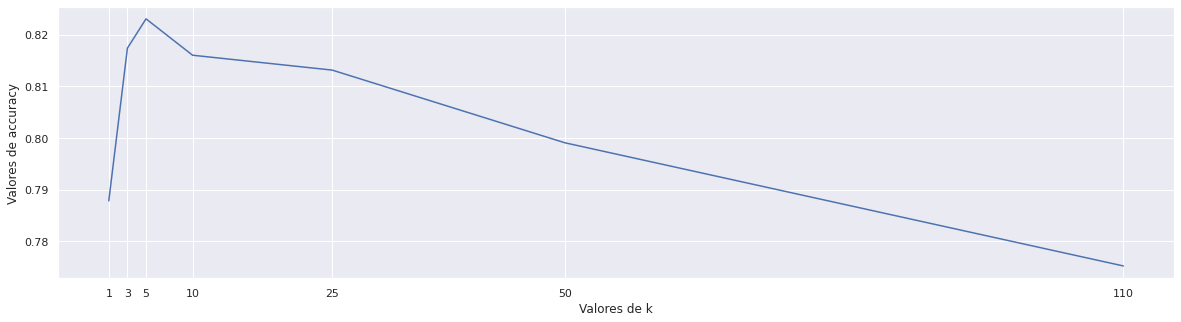

In [103]:
accuracy_list = []

Ks = [1, 3, 5, 10, 25, 50, 110]

for k in Ks:

  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train_std, y_train, cv = 5)

  accuracy_list.append(scores.mean())

fig, ax = plt.subplots(figsize=(20,5))
ax.plot(Ks, accuracy_list)
ax.set(xlabel="Valores de k", ylabel="Valores de accuracy", xticks=Ks)
plt.show()

In [104]:
classifier.score(X_test_std, y_test)

0.7877094972067039

In [105]:
knn_pred_3 = classifier.predict(X_test_std)
knn_pred_3

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0])

In [106]:
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_pred_3, zero_division = 0))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.75      0.68      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



Text(0.5, 12.5, 'Resultado Predito')

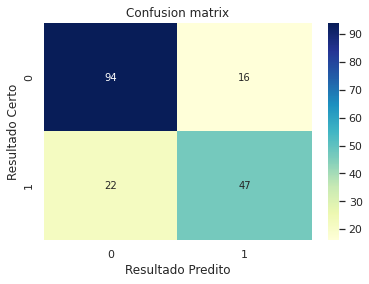

In [107]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_pred_3)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

### SVM

In [108]:
from sklearn.svm import SVC

In [109]:
classifier_svm = SVC(kernel='poly', random_state=0)
classifier_svm.fit(X_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [110]:
y_pred_svc = classifier_svm.predict(X_test_std)

Text(0.5, 12.5, 'Resultado Predito')

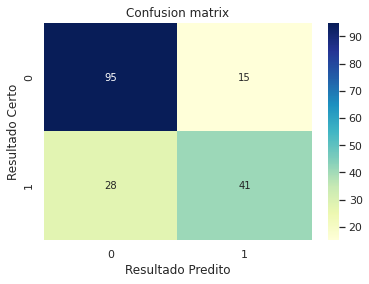

In [111]:
cnf_matrix = confusion_matrix(y_test, y_pred_svc)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

### Kernel SVM

In [112]:
from sklearn.svm import SVC

# usando kernel polinomial
model_svc_kernel = SVC(kernel='rbf', gamma = 0.1)

In [113]:
model_svc_kernel.fit(X_train_std, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [114]:
y_pred_svc_kernel = model_svc_kernel.predict(X_test_std)

Text(0.5, 12.5, 'Resultado Predito')

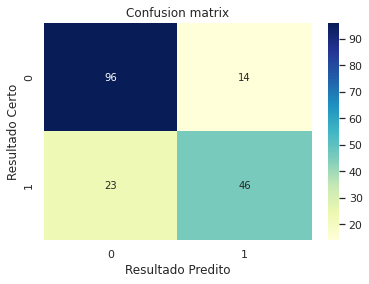

In [115]:
cnf_matrix = confusion_matrix(y_test, y_pred_svc_kernel)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

### Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'gini', random_state=0)

In [117]:
classifier_dt.fit(X_train_std, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [118]:
y_pred_dt = classifier_dt.predict(X_test_std)

Text(0.5, 12.5, 'Resultado Predito')

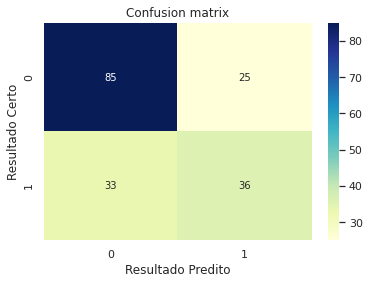

In [119]:
cnf_matrix = confusion_matrix(y_test, y_pred_dt)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

### Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state=0)
classifier_rf.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [121]:
y_pred_rf = classifier_rf.predict(X_test_std)

Text(0.5, 12.5, 'Resultado Predito')

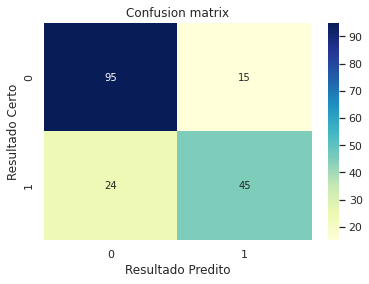

In [122]:
cnf_matrix = confusion_matrix(y_test, y_pred_rf)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')

Text(0, 0.5, 'Testing Accuracy')

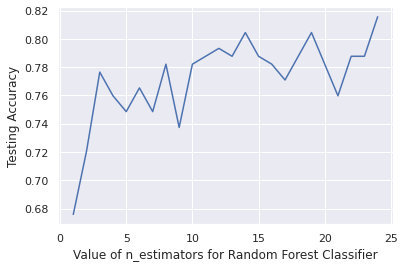

In [123]:
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 25):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(X_train, y_train)
    y_pred_rf_new = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_rf_new))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 25), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

### Applying the results

In [124]:
test_df = pd.read_csv('test.csv')
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [125]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [126]:
test_df = test_df.drop(columns=['Name', 'Cabin', 'Embarked', 'Ticket'])

In [127]:
test_df.loc[test_df['Age'].isnull(), 'Age'] = int(test_df.Age.mean())

In [128]:
test_df['Sex'] = test_df['Sex'].map(lambda s :1  if s == 'female' else 0)
pd.unique(test_df['Sex'])

array([0, 1])

In [129]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
dtype: int64

In [130]:
test_df.loc[test_df['Fare'].isnull(), 'Fare'] = int(test_df.Fare.mean())

In [131]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [132]:
y_test_pred_rf = classifier_rf.predict(test_df)

In [133]:
df_results = pd.DataFrame(data=test_df, columns=['PassengerId'])
df_results['Survived'] = y_test_pred_rf.astype('int')
df_results.head(5)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [134]:
df_results.to_csv('results_rf.csv')

In [135]:
knn_pred_3 = classifier.predict(test_df)

In [136]:
df_results = pd.DataFrame(data=test_df, columns=['PassengerId'])
df_results['Survived'] = knn_pred_3.astype('int')
df_results.to_csv('results_knn.csv')

In [137]:
y_pred_svc = classifier_svm.predict(test_df)

In [138]:
df_results = pd.DataFrame(data=test_df, columns=['PassengerId'])
df_results['Survived'] = y_pred_svc.astype('int')
df_results.to_csv('results_svc.csv')

In [139]:
y_pred_svc_kernel = model_svc_kernel.predict(test_df)

In [140]:
df_results = pd.DataFrame(data=test_df, columns=['PassengerId'])
df_results['Survived'] = y_pred_svc_kernel.astype('int')
df_results.to_csv('results_svm.csv')

[0.26585718 0.20509607 0.19966327 0.17880433 0.06023838 0.05886365
 0.03147711]
(712, 4)
(179, 4)
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       110
           1       0.74      0.58      0.65        69

    accuracy                           0.76       179
   macro avg       0.75      0.73      0.73       179
weighted avg       0.76      0.76      0.75       179



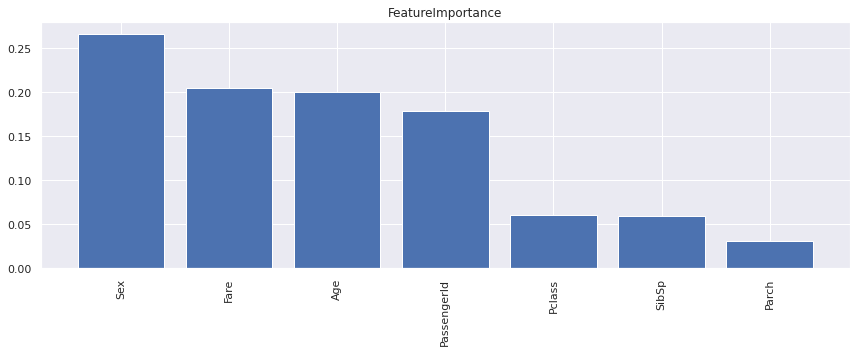

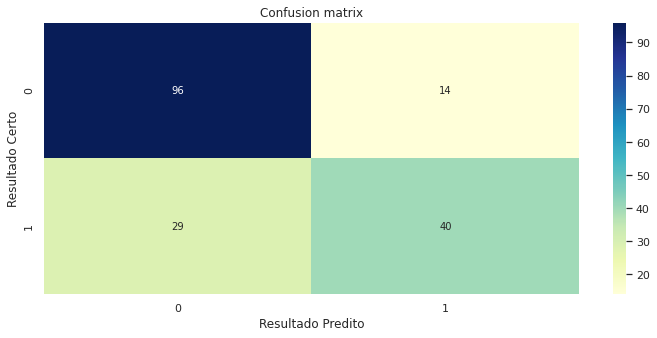

In [141]:
classifier_rf.fit(X_train_std, y_train)
importancias = classifier_rf.feature_importances_
indices = np.argsort(importancias)[::-1]
print(importancias[indices])

#Visualizando as Importancias
plt.figure(figsize=(12,5))
plt.title('FeatureImportance')
plt.bar(range(X_train.shape[1]),
        importancias[indices],
        align = 'center')
plt.xticks(range(X_train.shape[1]),
            features.columns[indices],
            rotation = 90)
plt.tight_layout()

#escolhendo as Importancias
X_train_escolhido = X_train_std[:, importancias[indices] >= 0.1]
X_test_escolhido = X_test_std[:, importancias[indices] >= 0.1]
print(X_train_escolhido.shape)
print(X_test_escolhido.shape)


classifier_rf.fit(X_train_escolhido, y_train)
y_pred_rfc = classifier_rf.predict(X_test_escolhido)
cnf_matrix = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(12,5))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Resultado Certo')
plt.xlabel('Resultado Predito')
print(classification_report(y_test, y_pred_rfc))

**Resultado do Kaggle**

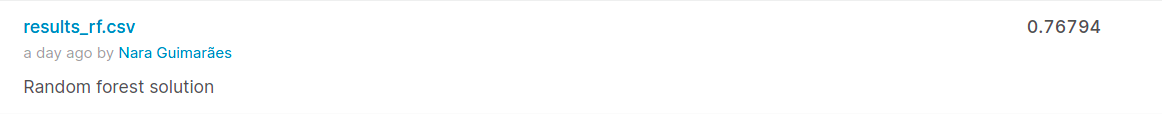